[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gcmatos/python-para-geociencias/blob/master/notebooks/2.1%20Importação%20e%20visualização%20de%20dados.ipynb)

Ctrl/Cmd + click para abrir em uma nova aba do navegador web e utilizar o Google Colab para rodar o tutorial.

# Importação e visualização de dados

__O que iremos aprender__
- Carregar dados provenientes arquivos ou objetos de bibliotecas para análise
- Controle de qualidade de dados importados
- Visualizar dados tabulares
- Visualizar dados geoespaciais

## Configuração de ambiente
Instalaçao e importação dos pacotes Python para o tutorial sobre estruturas de dados.

### Instalação de dependências
Comandos para Linux Ubuntu.

In [ ]:
# Instalar biblioteca para importar e exportar arquivos Excel
!pip install xlrd
!pip install openpyxl

In [ ]:
# Instalar Pyproj
!sudo apt-get install python-pyproj

In [ ]:
# Instalar GeoPandas
!pip install shapely fiona six geopandas

In [ ]:
# Instalação do Basemap
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [ ]:
# Instalar mplstereonet para visualizar dados de orientação
!pip install mplstereonet

In [ ]:
# Instalar Pyproj
!sudo apt-get install python-pyproj

In [ ]:
# Instalar GeoPandas
!pip install shapely fiona six geopandas

In [ ]:
# Instalar Cartopy (code snippet)
!apt-get -qq install python-cartopy python3-cartopy

In [ ]:
# Instalar o Python Shapefile Library
!pip install pyshp

In [ ]:
# Instalar biblioteca GDAL para importar arquivos TIFF
!apt install gdal-bin python-gdal python3-gdal

### Importar bibliotecas

In [ ]:
# Importação de arquivos
import numpy as np
import pandas as pd
import geopandas as gpd

# Matplotlib em células de códigos
%matplotlib inline

# Gráficos
import seaborn as sns

import matplotlib.pyplot as plt
# Imagens
import matplotlib.image as mpimg
# Stereonet
# import mplstereonet

In [ ]:
# Basemap
from mpl_toolkits.basemap import Basemap

In [ ]:
# Cartopy
import cartopy
import cartopy.crs as ccrs

In [ ]:
# GDAL
from osgeo import gdal

In [2]:
# Ignorar alertas
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Matplotlib style
plt.style.use('default')
# plt.style.available

In [ ]:
# Configuração para reproduzir números aleatórios
np.random.seed(0)

In [ ]:
# Ajustar a precisão do output de valores reais
%precision 3

### Subir arquivos
Os arquivos que serão utilizados neste tutorial são:
- Arquivos texto (arquivo.csv, arquivo.txt)
- Arquivo Excel (arquivo.xlsx)
- Scripts Python (basic.py, contouring.py, stereonet_explanetion.py, stereonet_coordinate_systems.py, equal_area_equal_angle_comparison.py)
- Imagem sísmica (seismic_section.png)
- Modelo Digital de Elevação (dem.tiff)
- Arquivos Shape da pasta 'shape_bacias_wgs1984'



In [ ]:
# Code snippet do Colab

In [ ]:
# Listar arquivos no diretório de trabalho
%ls

## Importação de dados
Neste curso daremos prioridade à biblioteca **`pandas`**, porém a importação de dados para análise em Python também pode ser feita com funções *built-in* ou com métodos **`numpy`**. Todas estas bibliotecas oferecem recursos para importação de dados tabulares, como arquivos com observações (linhas) e atributos (colunas), e dados não-estruturados como imagens e textos. 

A biblioteca `pandas`, que foi construida sobre a estrutura do `numpy`, possui a gama mais completa de ferramentas para importar, manipular e analisar dados rotulados tabulares e séries de tempo. Todo dado importado como estrutura `pandas`, pode ser manipulado com o auxílio dos inúmeros métodos disponíveis, como foi visto notebook [1.3 Estruturas de dados em Python](https://drive.google.com/open?id=1GiTFcq_jtfMsCsqa5-6TuDOsYxKDFmNI). Estes métodos contêm uma vasta documentação de referências, ajuda e totoriais, que é mantida e alimentada por uma comunidade internacional com milhares de colaboradores/desenvolvedores.

A biblioteca `numpy` aceita estruturas pandas como Series e DatFrame, sendo utilizada principalmente no processamento de dados geofísicos, sensoriamento remoto e imagens. Numpy é muito utilizado em computação científica devido aos métodos matemáticos disponíveis para solucionar problemas numéricos tensoriais com alta performance. 

Os arquivos de entrada utilizados neste curso são:
- Arquivos texto (.csv, .txt)
- Planilhas Excel (.xlsx)
- Arquivos georreferenciados (.shp)
- Imagens (.png)


### Arquivos em formato texto

__Tabela com alguns dos métodos `pandas` para arquivos texto__

Considerando:

```python
import pandas as pd
```


Método | Descrição
--- | ---
 `pd.read_csv` | Carregar arquivo CSV com valores separados por vírgula `','`
 `pd.read_table` | Carregar arquivo TXT com valores separados por tabulação `'\t'`
 `pd.read_excel` | Carregar arquivo Excel XLS ou XLSX
 
 

__Valores separados por vírgula (CSV)__

In [ ]:
# Previsualizar dados
!cat arquivo.csv

In [ ]:
# Ler arquivo e criar DataFrame
df = pd.read_csv('arquivo.csv')
# df = pd.read_csv('arquivo.csv', index_col=['key1', 'key2'])
# df = pd.read_csv('arquivo.csv', 
#                  header=0, 
#                  names=['atributo1', 'atributo2', 'Indice', 'atributo3'], 
#                  index_col=['Indice'])
df

In [ ]:
# Converter para dicionário
df.to_dict()

In [ ]:
# Gravar arquivo local
df.to_csv('arquivo_exportado.csv')
# Checar gravação
%ls

In [ ]:
# Visualizar dado exportado
!cat arquivo_exported.csv

__Valores separados por tabulação (TXT)__

In [ ]:
# Previsualizar dados
!cat arquivo.txt

In [ ]:
# Ler arquivo e criar DataFrame
# df = pd.read_table('arquivo.txt', sep='\s')
df = pd.read_table('arquivo.txt', sep='\s+')
df

In [ ]:
# Gravar arquivo local
df.to_csv('arquivo_exported.txt', sep='\t')
# Checar gravação
%ls

In [ ]:
# Visualizar dado bruto
!cat arquivo_exported.txt

### Planilhas Excel

In [ ]:
# Importar usando ExcelFile
xlsx = pd.ExcelFile('arquivo.xlsx')
# Imprimir os nomes das Sheets
xlsx.sheet_names

In [ ]:
# Criar DataFrame com método do ExcelFile
df_sheet1 = xlsx.parse('Sheet1')
df_sheet1

In [ ]:
# Exportar arquivo em formato Excel
writer = pd.ExcelWriter('sheet1.xlsx')
df_sheet1.to_excel(writer, 'Sheet1')
writer.save()
%ls

In [ ]:
# Importar arquivo e criar DataFrame
df_sheet2 = pd.read_excel('arquivo.xlsx', 'Sheet2')
df_sheet2

In [ ]:
df_sheet2.to_excel('sheet2.xlsx')
%ls

### Imagens
Imagens são carregadas como **`ndarrays`** para serem visualizadas com matplotlib. O formato nativo da biblioteca matplotlib é o PNG. Se for preciso importar dados em outros formatos (JPG, TIFF) é necessário instalar bibliotecas extras como PIL e OpenCV.

In [ ]:
# Importar imagem PNG e transformar em ndarray
# img = mpimg.imread('https://matplotlib.org/_images/stinkbug.png')
img = mpimg.imread('seismic_section.png')
img
# img.shape

### *Shapefiles*
Importação de shapefiles deve ser feita com `GeoPandas`, pois esta biblioteca combina recursos `Pandas`, `Shapely` e `Fiona` para manipulção e `Matplotlib` para visualização.

__Importação de arquivos shape com GeoPandas__

In [3]:
# Importação dados de shapefiles
shape_bacias = gpd.read_file(
    '../dados/shape_bacias_wgs1984/shape_bacias_wgs1984.shp')

In [ ]:
# Verificar dados tabular
shape_bacias.head()

In [ ]:
# Verificar geometria
shape_bacias.geometry[0] # Bacia de Irecê

In [ ]:
# Verificar sistema de coordenadas
shape_bacias.crs

__Importação de dados de repositórios__

In [4]:
# Importar dados do repositório datasets do GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.head()

In [ ]:
world.plot();

In [ ]:
world.crs

In [ ]:
gpd.datasets.available

## Visualização de dados tabulares

### Matplotlib API
Construir figuras com dados científicos em padrão de publicação e torná-las reproduzíveis são os objetivos da biblioteca Matplotlib.
Figuras matplotlib são compostas por objetos que representam elementos estéticos e que podem ser customizados utilizando sintaxe Python.

![Matplotlib aesthetics](https://dz13w8afd47il.cloudfront.net/graphics/9781788295260/graphics/751f256f-8d1f-4001-a0b7-a318659c07e4.png)

Figura ilustrando os principais elementos estéticos de um gráfico no Matplotlib.


### Figuras, *plot* e *subplot*

In [ ]:
# Criar figura
plt.figure()
# Nomear os eixos
plt.xlabel('x')
plt.ylabel('y')
# Tïtulo do gráfico
plt.title('Título')
# Exibir gráfico
plt.show()

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.show()

In [ ]:
# fig, axes = plt.subplots(2, 2)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.subplots_adjust(wspace=0, hspace=0)
axes

In [ ]:
plt.close('all')

### Gráficos

__Linhas e pontos__

In [ ]:
data = np.arange(10)
# data

# Matplotlib API
plt.plot(data)
plt.show()

In [ ]:
data = np.cumsum(np.random.randn(1000, 1))
# data
# Matplotlib API
plt.plot(data)
plt.show()

In [ ]:
valores = np.random.randn(30).cumsum()

# Matplotlib API
# plt.plot(valores)
# plt.plot(valores, '+')
# plt.plot(valores, 'go--')
plt.plot(valores, linestyle='--', color='g', marker='o')

plt.show()

In [ ]:
# Matplotlib API
fig = plt.figure()

plt.plot(np.random.randn(500).cumsum(), 'k', label='one')
plt.plot(np.random.randn(500).cumsum(), 'k--', label='two')
plt.plot(np.random.randn(500).cumsum(), 'k.', label='three')

plt.legend(loc='best')

plt.show()

In [ ]:
# Plotar gráfico com 3 variáveis com matplotlib API
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='ao quadrado')
plt.plot(x, x**3, label='ao cubo')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Gráfico Simples")

plt.legend()

plt.show()

In [ ]:
plt.close('all')

In [ ]:
# Gráficos com pandas API

valores = np.random.randn(10).cumsum()

s = pd.Series(valores, index=np.arange(0, 100, 10))

# s.plot();

In [ ]:
# Gráficos com pandas API

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot();

In [ ]:
values = np.random.randn(10, 4).cumsum(0)

df = pd.DataFrame(values,
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot();

In [ ]:
plt.close('all')

__Gráficos de correlação__

In [ ]:
# Importar Iris dataset usando Seaborn API

df = sns.load_dataset('iris')
df.head()

In [ ]:
# Plot x-y com Matplotlib API

plt.plot('sepal_width', 'sepal_length', data=df)
# plt.scatter('sepal_width', 'sepal_length', data=df)

plt.show()

In [ ]:
# Plot x-y com regressão linear com Seaborn API

sns.regplot(x='sepal_width', y='sepal_length', data=df);
# sns.regplot(x='sepal_width', y='sepal_length', data=df[df.species == 'setosa']);

In [ ]:
g = sns.pairplot(df, kind="reg")

__Gráficos de distribuição__

In [ ]:
# Histograma com Matplotlib API

plt.figure()

plt.hist(np.random.randn(500))
# plt.hist(np.random.randn(500))
# plt.hist(np.random.randn(500))

plt.show()

In [ ]:
# Subplots de histogramas com Matplotlib API
fig, axes = plt.subplots(2, 2)

axes[0, 0].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
axes[0, 1].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
axes[1, 0].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
axes[1, 1].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.show()

# Subplots de forma programática
# for i in range(2):
#     for j in range(2):
#         axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

# plt.show()

In [ ]:
# Importar Iris dataset
df = sns.load_dataset('iris')
df.head()

In [ ]:
# Histograma usando pandas API
df['sepal_length'].plot.hist();

In [ ]:
# Histograma Seaborn API
sns.distplot(df['sepal_length']);

In [ ]:
plt.close('all')

In [ ]:
# Distribuição por variáveis categóricas com Seaborn API
sns.boxplot(x='sepal_length', y='species', data=df);
# sns.violinplot(x='species', y='sepal_length', data=df);

__Gráficos de barras__

In [ ]:
s = pd.Series(np.random.rand(7), index=list('abcdefg'))
s

In [ ]:

# Ugly
# s.plot.bar();

# Good!
s.sort_values().plot.barh(color='k', alpha=0.7);

# Bad
# s.plot.bar(color='k', alpha=0.7);

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

In [ ]:
# Gráficos de barras com pandas API

# df.plot.bar();
df.plot.barh(stacked=True);

In [ ]:
# Importar Iris dataset

df = sns.load_dataset('iris')
df.head()

In [ ]:
sns.barplot(x='petal_width', y='species', data=df.dropna());

In [ ]:
plt.close('all')

__Múltiplas variáveis__

In [ ]:
# Dashboard de análise com Matplotlib API

df = sns.load_dataset('iris')

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(x='sepal_width', y='sepal_length', data=df)

ax2 = fig.add_subplot(2, 2, 2)
ax2.hist([df['sepal_width']])

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(df['sepal_width'])
ax3.plot(df['sepal_length'])

ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(df['sepal_length'])

plt.show()

In [ ]:
# Analisar múltiplas variáveis com Seaborn API
sns.pairplot(df);

In [ ]:
plt.close('all')

__*Stereonet* e rosetas__

In [ ]:
%run stereonet_explanation.py

In [ ]:
%run stereonet_coordinate_systems.py

In [ ]:
%run equal_area_equal_angle_comparison.py

In [ ]:
%run basic.py

In [ ]:
%run contouring.py

In [ ]:
"""
Plots rose diagram from Geology and Python web site
http://geologyandpython.com/structural_geology.html
"""

strikes = np.random.randint(0, 360, 50)

#Calculate the number of directions (strikes) every 10° using numpy.histogram.
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
#Sum the last value with the first value.
number_of_strikes[0] += number_of_strikes[-1]
#Sum the first half 0-180° with the second half 180-360° to achieve the "mirrored behavior" of Rose Diagrams.
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

#Plot rose diagram
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.6')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 20), labels=np.arange(0, 360, 20))

plt.show()


In [ ]:
plt.close('all')

## Visualização geoespacial


### GeoPandas

__Plotar dados com o método `GeoPandas.plot()`__

In [ ]:
world.plot()
plt.show()

In [ ]:
shape_bacias.plot()
plt.show()

__FIltrar dados para visualização__

In [ ]:
# Criar shape por situação de bacia
terrestres = shape_bacias[shape_bacias['SITUAÇÃO'] == 'Terrestre']
terrestres.plot();

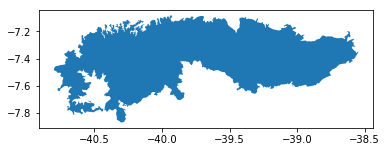

In [5]:
# Criar shape de uma bacia e plotar
araripe = shape_bacias[shape_bacias.NOME_BACIA == 'Bacia do Araripe']
araripe.plot();

__Plotar camadas em mapa__

In [6]:
# Criar shape do Brasil
brazil = world[world.name == 'Brazil']

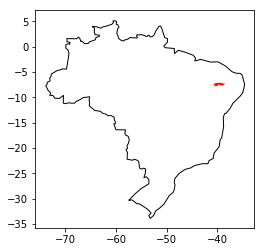

In [6]:
# Criar primeira camada
ax = brazil.plot(color='white', edgecolor='black')
# Sobrepor a segunda camada utilizando o Axes criado
araripe.plot(ax=ax, color='red')
plt.show()

__Utilizar Subplots para arranjos de mapas__

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

brazil = world[world.name == 'Brazil']
brazil.plot(ax=ax1, color='white', edgecolor='black')

araripe = shape_bacias[shape_bacias.NOME_BACIA == 'Bacia do Araripe']
araripe.plot(ax=ax1)
ax1.axis('off')

araripe.plot(ax=ax2)
ax2.set_title('Bacia do Araripe')

plt.show()

__Plotar atributos de shapes__

In [ ]:
# Plotar pontos centróides das bacias
ax = shape_bacias.centroid.plot(markersize=10, color='black', alpha=0.5)
ax.axis('off')
plt.show()

In [ ]:
# Plotar atributos não espaciais
shape_bacias.area.plot();

__Conversão de atributos em variáveis__

In [ ]:
shape_bacias['AREA'] = shape_bacias.area
shape_bacias['centroid'] = shape_bacias.centroid

In [ ]:
ax = world[world.name == 'Brazil'].plot(
    color='lightgrey', linewidth=0.5, edgecolor='white')
shape_bacias.plot(
    ax=ax, column='AREA', markersize=15, alpha=0.5, cmap='hot', legend=True)
ax.axis('off')
ax.set_title('Áreas das bacias sedimentares do Brasil')
plt.show()

In [ ]:
ax = brazil.plot(color='lightgrey', linewidth=0.5, edgecolor='white')
shape_bacias.centroid.plot(ax=ax, markersize=15, alpha=0.5, cmap='inferno')
ax.axis('off')
plt.show()

__Projeções geoespaciais com GeoPandas__

In [ ]:
# world.crs
world = world.to_crs(epsg=4326)

In [ ]:
ax = world.plot()
ax.set_title("WGS84 (Lat/Lon)");

In [ ]:
world = world.to_crs(epsg=3395) # {'init': 'epsg:3395'}
ax = world.plot()
ax.set_title("Mercator");

In [ ]:
world = world[(world.name != "Antarctica")
              & (world.name != "Fr. S. Antarctic Lands")]
ax = world.plot()
ax.set_title("Mercator");

### Cartopy

__Projeções__

In [ ]:
fig = plt.figure(figsize=(10, 20))

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.stock_img()

ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Mollweide())
ax2.stock_img()

plt.show()

__Editar aparência de um mapa__

In [ ]:
from matplotlib.offsetbox import AnchoredText

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

text = AnchoredText(
    r'$\mathcircled{{c}}$ {}; license: {}'
    ''.format(SOURCE, LICENSE),
    loc=4,
    prop={'size': 10},
    frameon=True)

fig = plt.figure(figsize=(10, 20))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
ax.add_artist(text)
plt.show()

### Basemap

In [ ]:
"""
Matplotlib Basemap Toolkit API

Projeção: Mercator

input: 
    projection = mnemonico da projeção, default='cyl' Cylindrical Equidistance
    llcrnrlat, llcrnrlon = latitude of lower left, longitude of lower left
    urcrnrlat, urcrnrlon = latitude of upper right, longitude of upper right
    resolution='c' significa 'crude resolution' para contornos

output: map
"""

# Criar instância (m) Basemap
m = Basemap(projection='merc',llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, 
            urcrnrlon=180, resolution='c')

m.etopo()

# Desenhar features
m.drawcoastlines()

# Desenhar paralelos e meridianos
m.drawparallels(np.arange(-90., 91., 30.))
m.drawmeridians(np.arange(-180., 181., 60.))
m.drawmapboundary(fill_color='aqua')

plt.title("Mercator Projection")

plt.show()

In [ ]:
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
m = Basemap(projection='ortho', lon_0=-51, lat_0=14, resolution='l')
m.drawcoastlines()
m.bluemarble()

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.), color='white')
m.drawmeridians(np.arange(0.,420.,60.), color='white')
m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Orthographic Projection")
plt.show()

Para plotar gráficos com Basemap é necessário
converter unidades (Long, Lat) em coordenadas UTM (x, y)

sintaxe:
```
m(long, lat) = (x, y)
```
```
m(x, y) = (long, lat)
```

input/output: Tuple

In [ ]:
m = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)

print(m(10, 50))
# print(m(20015077.3712, 20015077.3712, inverse=True))

In [ ]:
m = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcoastlines()

lons = [0, 10, -20, -20]
lats = [0, -10, 40, -20]

x, y = m(lons, lats)

m.scatter(x, y, marker='D', color='m')

plt.show()

In [ ]:
# Criar dados hipotéticos
nlats = 73
nlons = 145
delta = 2. * np.pi / (nlons - 1)
lats = (0.5 * np.pi - delta * np.indices((nlats, nlons))[0, :, :])
lons = (delta * np.indices((nlats, nlons))[1, :, :])
wave = 0.75 * (np.sin(2. * lats)**8 * np.cos(4. * lons))
mean = 0.5 * np.cos(2. * lats) * ((np.sin(2. * lats))**2 + 2.)

In [ ]:
fig = plt.figure(figsize=(10, 10))

m = Basemap(width=7000000, height=10000000, 
            resolution='i', 
            projection='tmerc', 
            lat_0=-18., lon_0=-60.)

m.shadedrelief()
# m.bluemarble()
# m.etopo()

# compute native map projection coordinates of lat/lon grid.
x, y = m(lons*180./np.pi, lats*180./np.pi)

# Criar mapa de contorno
cs = m.contour(x, y, wave + mean, 15, linewidths=1.5)
cs = m.contourf(x, y, wave + mean, 15, linewidths=1.5, alpha=0.3)

plt.show()

In [ ]:
# Importar DEM
ds = gdal.Open("dem.tiff")
data = ds.ReadAsArray()

# Plot
fig = plt.figure(figsize=(10, 10))

m = Basemap(projection='tmerc',
            lat_0=0, lon_0=3,
            llcrnrlon=1.819757266426611, 
            llcrnrlat=41.583851612359275, 
            urcrnrlon=1.841589961763497, 
            urcrnrlat=41.598674173123)

x = np.linspace(0, m.urcrnrx, data.shape[1])
y = np.linspace(0, m.urcrnry, data.shape[0])

xx, yy = np.meshgrid(x, y)

m.contour(xx, yy, data)

# m.contourf(xx, yy, data)

# m.pcolormesh(xx, yy, data)

# cs = m.contour(xx, yy, data, range(400, 1500, 100), cmap = plt.cm.cubehelix)

# plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=12, colors='k')

plt.show()


In [ ]:
data.ndim

## Visualização de imagens

In [ ]:
# Plotar imagem com matplotlib
plt.figure()
plt.imshow(img)
plt.grid('off')

In [ ]:
# Plotar o histograma de intensidade de pixels
plt.figure()
plt.hist(img[:, :, 0].ravel(), bins=256, fc='r', alpha=0.6, label='RED')
plt.hist(img[:, :, 1].ravel(), bins=256, fc='g', alpha=0.6, label='GREEN')
plt.hist(img[:, :, 2].ravel(), bins=256, fc='b', alpha=0.6, label='BLUE')
plt.title("Histograma de bandas R, G, B")
plt.legend();

In [ ]:
# Plotar os mapas de pixels de cada banda RGB
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(3, 1, 1)
ax1.imshow(img[:, :, 0], cmap='Reds')
ax1.set_title('Banda RED')
ax1.grid(False)

ax2 = fig.add_subplot(3, 1, 2)
ax2.imshow(img[:, : , 1], cmap='Greens')
ax2.set_title('Banda GREEN')
ax2.grid(False);

ax3 = fig.add_subplot(3, 1, 3)
ax3.imshow(img[:, : , 2], cmap='Blues')
ax2.set_title('Banda BLUE')
ax3.grid(False);

In [ ]:
# Plotar com diferentes colormaps
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(img[:, :, 0], cmap='hot')
ax1.grid(False)

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(img[:, : , 0], cmap='nipy_spectral')
ax2.grid(False)
plt.show()

In [ ]:
plt.close('all')

In [ ]:
import contextily as ctx


def add_basemap(ax, zoom, url=''):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(
        xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [ ]:
ax = araripe.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

In [ ]:
ax = araripe.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

__Referências__

- [The Python Graph Gallery](https://python-graph-gallery.com/)
- [Kaggle's Data Visualization Tutorial](https://www.kaggle.com/learn/data-visualisation)
- [Fundamentals of Data Visualization eBook](https://serialmentor.com/dataviz/index.html)
- [Matplotlib Tutorial](https://matplotlib.org/tutorials/index.html)
- [Basemap Web page](https://matplotlib.org/basemap/)
- [Basemap Tutorial](https://basemaptutorial.readthedocs.io/en/latest/index.html)
- [Basemap Tutorial - GitHub](https://github.com/rveciana/BasemapTutorial)
- [Cartopy Tutorial](https://github.com/SciTools/cartopy-tutorial)
- [Geology and Python](http://geologyandpython.com/)

